In [ ]:
#Importacion de librerias que se van a usar en el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [ ]:
#Cargamos los datos de ejemplo
df_nations = pd.read_csv("https://raw.githubusercontent.com/DireccionAcademicaADL/Nations-DB/main/nations.csv", encoding="ISO-8859-1")


In [ ]:
#Exploracion Inicial de los datos
df_nations.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [ ]:
#Eliminamos la columna que no aporta datos relevantes
df_nations.drop(columns=["Unnamed: 0"], inplace = True)


In [ ]:
#Visualizamos las columnas
df_nations.columns

Index(['country', 'region', 'gdp', 'school', 'adfert', 'chldmort', 'life',
       'pop', 'urban', 'femlab', 'literacy', 'co2', 'gini'],
      dtype='object')

In [ ]:
#Adicionamos una columna calculada donde hacemos una conversion de pesos
df_nations["gdp_pesos2021"] = df_nations["gdp"]*850

In [ ]:
#Validamos los cambios realizados
df_nations.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,gdp_pesos2021
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,6.205340e+06
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1.137980e+06
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1.046129e+07
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,9.038900e+05
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,2.968200e+05


In [ ]:
#Realizamos una inspeccion general de los atributos del dataset
df_nations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        194 non-null    object 
 1   region         194 non-null    object 
 2   gdp            179 non-null    float64
 3   school         188 non-null    float64
 4   adfert         194 non-null    float64
 5   chldmort       193 non-null    float64
 6   life           194 non-null    float64
 7   pop            194 non-null    int64  
 8   urban          194 non-null    float64
 9   femlab         177 non-null    float64
 10  literacy       135 non-null    float64
 11  co2            185 non-null    float64
 12  gini           81 non-null     float64
 13  gdp_pesos2021  179 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 21.3+ KB


In [ ]:
#Analizamos el dataset original con el metodo Describe
df_nations.describe()

,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,gdp_pesos2021
count,179.000000,188.000000,194.000000,193.000000,194.000000,1.940000e+02,194.000000,177.000000,135.000000,185.000000,81.000000,1.790000e+02
mean,12118.739193,7.459220,51.814433,47.650259,68.729295,3.437752e+07,55.434880,0.691606,81.533148,17.885946,40.477778,1.030093e+07
std,13942.341217,2.959589,44.066120,52.809400,10.055404,1.314004e+08,23.439101,0.182871,19.466359,25.670704,8.487874,1.185099e+07
min,279.799988,1.150000,1.000000,2.250000,45.849998,9.767000e+03,10.250000,0.194200,23.600000,0.100000,19.000000,2.378300e+05
25%,2100.300049,5.225000,16.500000,10.250000,63.745833,1.483754e+06,36.325000,0.578200,70.099998,2.250000,34.000000,1.785255e+06
50%,6932.799805,7.950000,39.350000,24.000000,72.183331,6.784909e+06,56.475000,0.730400,89.699997,8.450000,39.700001,5.892880e+06
75%,17576.299805,9.850000,74.375002,69.750000,75.545835,2.225532e+07,73.483334,0.820600,97.699997,25.000000,46.200001,1.493985e+07
max,74906.000000,12.700000,207.100006,209.000000,82.766663,1.324696e+09,100.000000,1.034400,100.000000,210.649994,58.500000,6.367010e+07


In [ ]:
df_nations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        194 non-null    object 
 1   region         194 non-null    object 
 2   gdp            179 non-null    float64
 3   school         188 non-null    float64
 4   adfert         194 non-null    float64
 5   chldmort       193 non-null    float64
 6   life           194 non-null    float64
 7   pop            194 non-null    int64  
 8   urban          194 non-null    float64
 9   femlab         177 non-null    float64
 10  literacy       135 non-null    float64
 11  co2            185 non-null    float64
 12  gini           81 non-null     float64
 13  gdp_pesos2021  179 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 21.3+ KB


In [ ]:
#Ahora empeza mos a resolver preguntas por ejemplo: Cuantos datos tenemos en cada region.
#Para observar un atributo categórico usaremos una tabla de frecuencias
df_nations["region"].value_counts()

,count
region,
Africa,52
Asia,49
Europe,43
Americas,35
Oceania,15


In [ ]:
# Otra forma de hacer este conteo, puede ser a través de una agrupación
df_nations.groupby(["region"])[["country"]].count()

,country
region,
Africa,52
Americas,35
Asia,49
Europe,43
Oceania,15


In [ ]:
# Usando where(), crearemos una variable nueva de co2, en dónde identifiquemos qué países están por debajo de la media, y qué países por sobre la media.
df_nations["co2_recodificada"] = np.where(df_nations["co2"]> df_nations["co2"].mean(), 1, 0)

In [ ]:
df_nations.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,gdp_pesos2021,co2_recodificada
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,6.205340e+06,0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1.137980e+06,0
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1.046129e+07,0
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,9.038900e+05,0
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,2.968200e+05,0


In [ ]:
# Para observar los resultados, podemos hacer una tabla de frecuencias
df_nations["co2_recodificada"].value_counts()

,count
co2_recodificada,
0,130
1,64


In [ ]:
#Resolvemos la pregunta: ¿Cuántos países tienen índices de _co2_ mayores a la media?
df_nations['co2_recodificada'].value_counts()[1]
print("Existen " + str(df_nations['co2_recodificada'].value_counts()[1]) + " países con índices de co2 mayores a la media")

Existen 64 países con índices de co2 mayores a la media


In [ ]:
#Respondemos la pregunta: ¿Que se puede decir del alfabetismo en áfrica o europa?
# Iniciamos con un Filtro por variable "Region"
df_nations[df_nations["region"]=="Africa"]

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,gdp_pesos2021,co2_recodificada
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.000000,NaN,6.205340e+06,0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.200000,NaN,1.137980e+06,0
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000,NaN,1.046129e+07,0
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.200000,NaN,9.038900e+05,0
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000,33.299999,2.968200e+05,0
5,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.750000,NaN,1.688780e+06,0
6,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.150000,NaN,2.594370e+06,0
7,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.200000,NaN,5.754500e+05,0
8,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.100000,NaN,1.076270e+06,0
9,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.400000,NaN,9.341500e+05,0


In [ ]:
#Creamos un Dataframe a partir de cada region analizada
df_africa = df_nations[df_nations["region"]=="Africa"]
df_europa = df_nations[df_nations["region"]=="Europe"]

In [ ]:
# Para analizar el alfabestimo en áfrica, podemos usar el método mean() en la variable "literacy" para la muestra "África"
df_africa["literacy"].mean()

65.30851067887976

In [ ]:
# Del mismo modo para Europa
df_europa["literacy"].mean()

98.17727279663086

In [ ]:
# De lo anterior se desprende que Europa tiene una tasa de alfabetismo de 98,1%
# mientras que en África alcanza sólo al 65.3%.

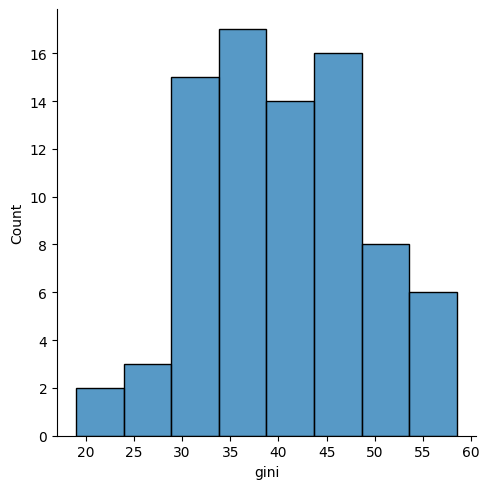

In [ ]:
# Ahora visualizamos los datos, Comenzaremos con crear un histograma que nos
# muestre la distribución del índice gini
sns.displot(df_nations["gini"], kind="hist")

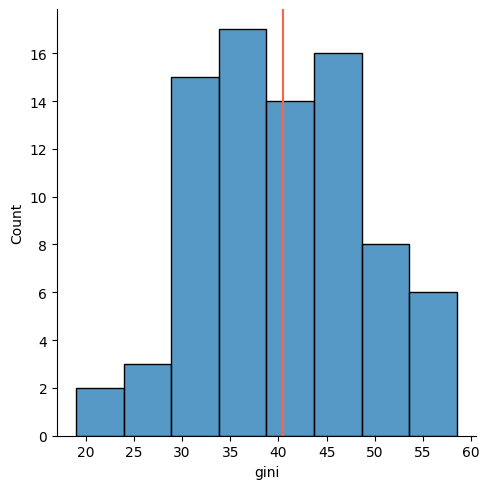

In [ ]:
#A la anterior grafica le agregamos un valor promedio
import matplotlib.pyplot as plt
sns.displot(df_nations["gini"], kind="hist")
plt.axvline(df_nations["gini"].mean(), color = "tomato")

<Axes: xlabel='region', ylabel='chldmort'>

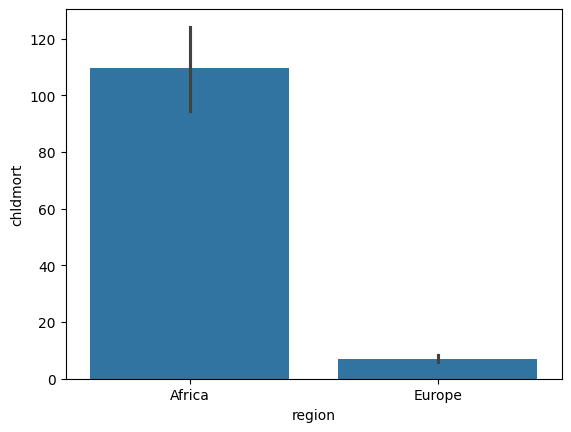

In [ ]:
#Ahora utilizaremos gráficos de barras para observar comparaciones de comportamiento de regiones versus el resto del mundo.
df_euafr = df_nations.loc[df_nations["region"].isin(["Europe","Africa"])]
sns.barplot(data=df_euafr, x="region", y="chldmort")

In [ ]:
# Otro gráfico de barras: Alfabetismo promedio entre Americas y el resto del mundo
# Filtrar los datos para las Americas y el resto del mundo
df_americas = df_nations[df_nations['region'] == 'Americas']
df_resto_mundo = df_nations[df_nations['region'] != 'Americas']

In [ ]:
# Calcular el alfabetismo promedio para cada grupo
alfabetismo_promedio_americas = df_americas['literacy'].mean()
alfabetismo_promedio_resto_mundo = df_resto_mundo['literacy'].mean()

<Axes: >

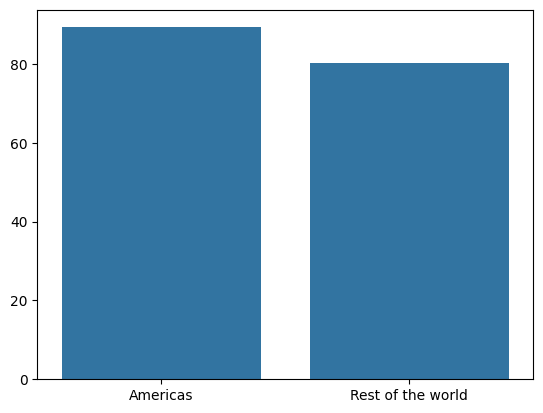

In [ ]:
# Crear el gráfico de barras utilizando sns.barplot
sns.barplot(x=['Americas', 'Rest of the world'], y=[alfabetismo_promedio_americas, alfabetismo_promedio_resto_mundo])

<Axes: xlabel='region', ylabel='school'>

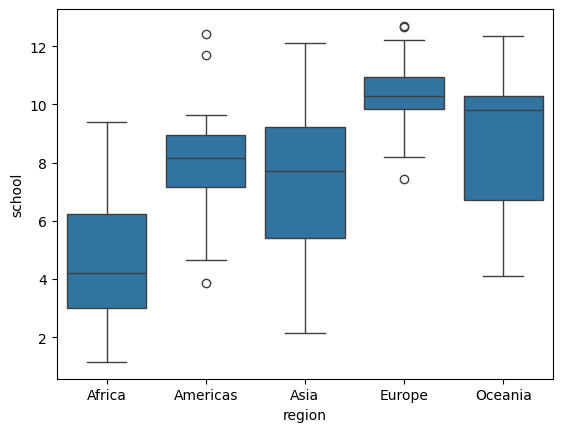

In [ ]:
# Ahora usando gráfico Boxplot para observar la distribución de la escolaridad por región

sns.boxplot(x=df_nations["region"], y=df_nations["school"])

In [ ]:
#Otra forma de observar la información es a traves de los diagramas de dispersión, pero para usar estos necesitamos eliminar datos perdidos en el dataset.
df_limpia = df_nations.dropna()

<Axes: xlabel='school', ylabel='literacy'>

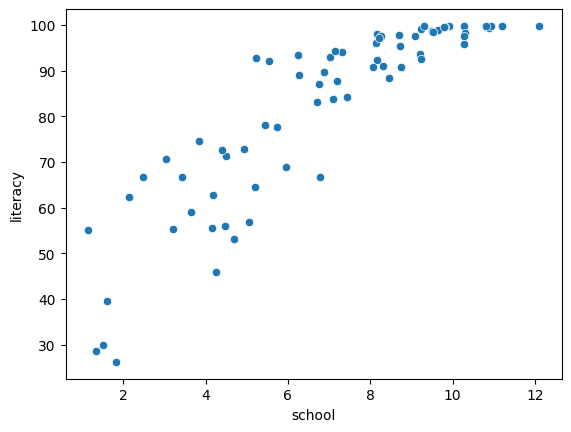

In [ ]:
#Validamos la dispersion de los años de escolaridad
sns.scatterplot(x=df_limpia["school"], y=df_limpia["literacy"])